In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

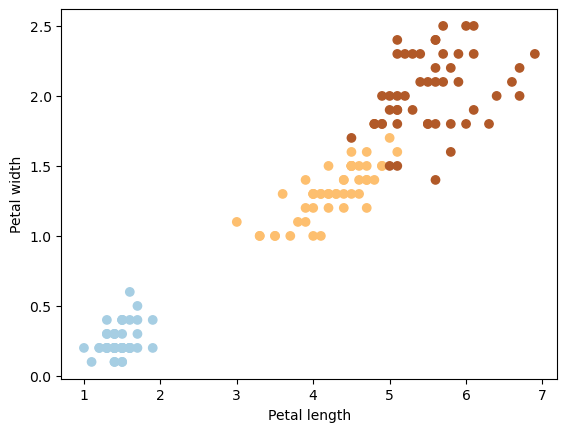

In [3]:
iris=datasets.load_iris()
X=iris.data[:,2:4]
y=iris.target

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# X_test[:10]

In [7]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [9]:
# 支持向量机
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr=LogisticRegression(random_state=0).fit(X_train_std,y_train)
print('逻辑回归正确率为: ',lr.score(X_train_std,y_train))
print('逻辑回归分类报告: ' ,classification_report(y_test,lr.predict(X_test_std),digits=5))

逻辑回归正确率为:  0.9416666666666667
逻辑回归分类报告:                precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        10
           1    1.00000   1.00000   1.00000         9
           2    1.00000   1.00000   1.00000        11

    accuracy                        1.00000        30
   macro avg    1.00000   1.00000   1.00000        30
weighted avg    1.00000   1.00000   1.00000        30



In [13]:
#kernel:和函数、gamma:高斯核函数的宽度、decision_function_shape:多分类时的决策函数形状
svc=svm.SVC(C=1.0,kernel='rbf',decision_function_shape='ovr',gamma=0.01)

svc.fit(X_train_std,y_train)
print('逻辑回归正确率为: ',svc.score(X_train_std,y_train))
print('逻辑回归分类报告: \n' ,classification_report(y_test,svc.predict(X_test_std),digits=5))

逻辑回归正确率为:  0.95
逻辑回归分类报告: 
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        10
           1    1.00000   1.00000   1.00000         9
           2    1.00000   1.00000   1.00000        11

    accuracy                        1.00000        30
   macro avg    1.00000   1.00000   1.00000        30
weighted avg    1.00000   1.00000   1.00000        30



In [14]:
#线性svm
svc_L=svm.SVC(C=1.0)

svc_L.fit(X_train_std,y_train)
print('逻辑回归正确率为: ',svc_L.score(X_train_std,y_train))
print('逻辑回归分类报告: \n' ,classification_report(y_test,svc_L.predict(X_test_std),digits=5))

逻辑回归正确率为:  0.95
逻辑回归分类报告: 
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        10
           1    1.00000   1.00000   1.00000         9
           2    1.00000   1.00000   1.00000        11

    accuracy                        1.00000        30
   macro avg    1.00000   1.00000   1.00000        30
weighted avg    1.00000   1.00000   1.00000        30



In [35]:
# def plot_boun(model,axis):
#     x0,x1=np.meshgrid(
#         np.linspace(axis[0]-0.2,axis[1]+0.2,int(100*(axis[1]-axis[0]))),
#         np.linspace(axis[2]-0.2,axis[3]+0.2,int(100*(axis[3]-axis[2])))
#     )
#     X_new=np.c_[x0.ravel(),x1.ravel()]
#     y_predict=model.predict(X_new)
#     zz=y_predict.reshape(x0.shape)
    
#     from matplotlib.colors import ListedColormap
#     custom=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
#     plt.contourf(x0,x1,zz,alpha=5,cmap=custom)
def plot_boun(model ,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0]-2,axis[1]+2,int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2]-2,axis[3]+2,int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new=np.c_[x0.ravel(),x1.ravel()]
    
    y_predict=model.predict(X_new)
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom = ListedColormap(['#EF9A9A', '#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom)
    

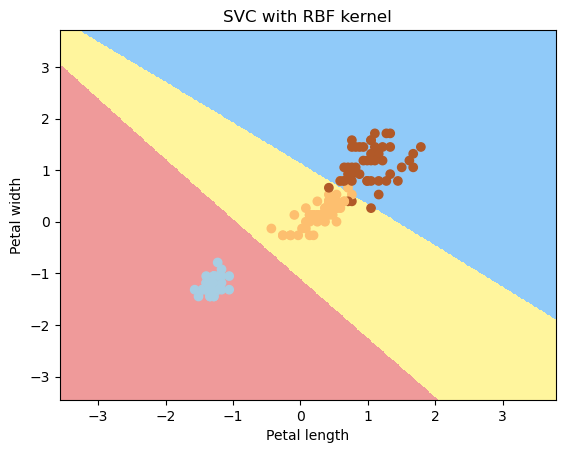

In [36]:
x_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))

min_1,max_1=x_combined_std[:,0].min(),x_combined_std[:,0].max()
min_2,max_2=x_combined_std[:,1].min(),x_combined_std[:,1].max()

plot_boun(svc, axis=[min_1,max_1,min_2,max_2])

plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combined,cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('SVC with RBF kernel')
plt.show()

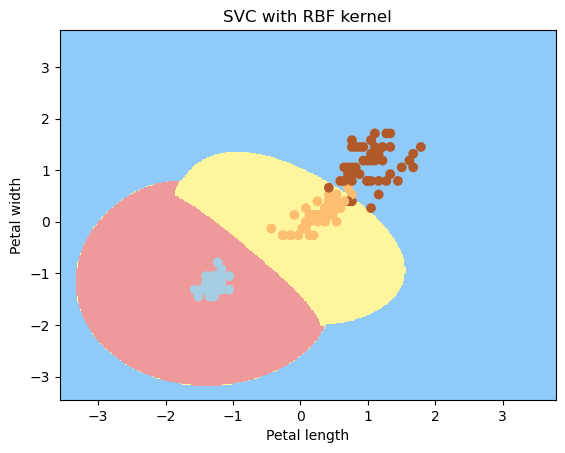

In [37]:
plot_boun(svc_L, axis=[min_1,max_1,min_2,max_2])

plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combined,cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('SVC with RBF kernel')
plt.show()

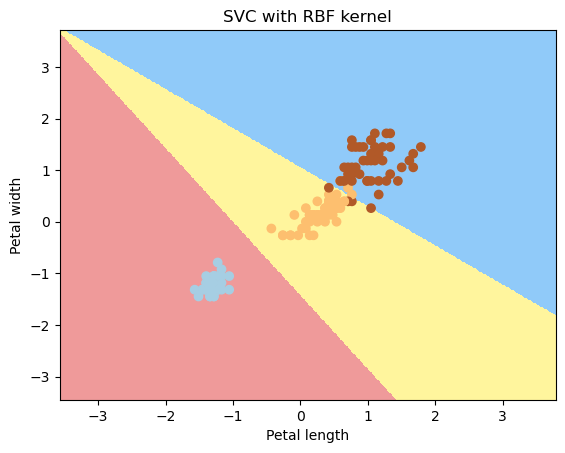

In [38]:
plot_boun(lr, axis=[min_1,max_1,min_2,max_2])

plt.scatter(x_combined_std[:,0],x_combined_std[:,1],c=y_combined,cmap=plt.cm.Paired)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('SVC with RBF kernel')
plt.show()